# CDC_Capstone: Part II - Data Analysis

Purpose: This is a mutli-class classification problem used to determine the probability of diabetes based on the features more dominant in my heat map:   'Income', GenHlth','MentHlth','PhysHlth','DiffWalk'

In [2]:
#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
#change number of columns displayed
pd.set_option('display.max_columns',100)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(font_scale=1.5);

#from my_Functions import all my functions
#%run my_functions.ipynb  ## create a functions file

In [3]:
import pandas as pd

url = "https://archive.ics.uci.edu/static/public/891/data.csv"
df = pd.read_csv(url)
 

### Feature: General Health Codes

 
 1 Excellent           
 2 Very good           
 3 Good                
 4 Fair                
 5 Poor                
 7 Don’t know/Not Sure 
 9 Refused             
                       

In [4]:
df['GenHlth'].describe()

count    253680.000000
mean          2.511392
std           1.068477
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64

The average General health is 3

<AxesSubplot:xlabel='GenHlth', ylabel='count'>

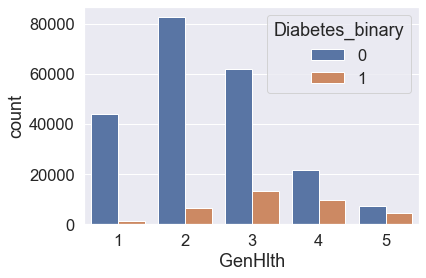

In [21]:
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df )

#### Will Feature Engineer Labels for Generl Health -- reference Feature_Engineering.ipynb


<AxesSubplot:xlabel='GenHlth', ylabel='Density'>

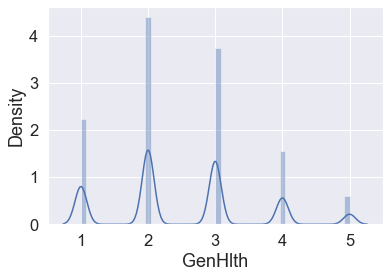

In [5]:
#distribution plot
sns.distplot(df['GenHlth'])

graphs show there are several categories of general health.  On average, the data collected is of individuals with good health

### Feature: Mental Health Codes

   
 1 - 30 Number of days   
 88 None                 
 77 Don’t know/Not sure  
 99 Refused              
                         

In [6]:
df['MentHlth'].describe()

count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

Max days mental health was recorded is 30 days.  The average is 3 days.

<AxesSubplot:xlabel='MentHlth', ylabel='Density'>

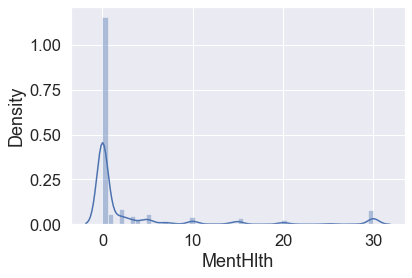

In [7]:
#distribution plot
sns.distplot(df['MentHlth'])

This data is not normally distributed. On average, a person's mental health was 3 days

### Feature: Physcial Health

   
 1 - 30 Number of days   
 88 None                 
 77 Don’t know/Not sure  
 99 Refused 

In [8]:
df['PhysHlth'].describe()

count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64

<AxesSubplot:xlabel='PhysHlth', ylabel='Density'>

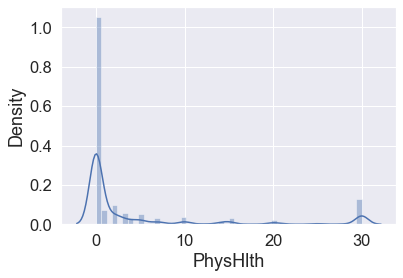

In [9]:
#distribution plot
sns.distplot(df['PhysHlth'])

This data is not normally distributed. On average, a person's physcial health was 4 days

#### Code: Difficulty Walking or Climbing Stairs (DiffWalk)    |            Income

In [10]:
 # Difficulty Walking or Climbing Stairs (DiffWalk) | Income
 # 1 - 30 Number of days                  | 1  - Less than $10,000                                |
 # 88 None                                | 2  - Less than $15,000 ($10,000 to less than $15,000) |
 # 77 Don’t know/Not sure                 | 3  - Less than $20,000 ($15,000 to less than $20,000) |
 # 99 Refused                             | 4  - Less than $25,000 ($20,000 to less than $25,000) |
 #                                        | 5 -  Less than $35,000 ($25,000 to less than $35,000) |
 #                                        | 6  - Less than $50,000 ($35,000 to less than $50,000) |
 #                                        | 7 - Less than $75,000 ($50,000 to less than $75,000)  |
 #                                        | 8  - $75,000 or more                                  |
 #                                        | 77 -  Don’t know/Not sure                             |
 #                                        | 99  - Refused                                         |                            
                                                 

In [11]:
df[['DiffWalk', 'Income']].describe()

,DiffWalk,Income
count,253680.000000,253680.000000
mean,0.168224,6.053875
std,0.374066,2.071148
min,0.000000,1.000000
25%,0.000000,5.000000
50%,0.000000,7.000000
75%,0.000000,8.000000
max,1.000000,8.000000


Average income for receipient in this dataset is less than 50K per year

<AxesSubplot:xlabel='PhysHlth', ylabel='Density'>

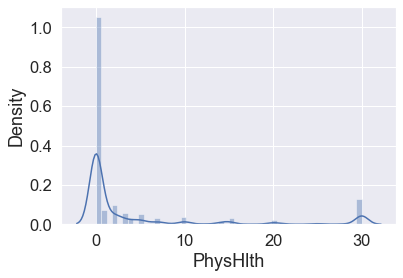

In [12]:
#distribution plot
sns.distplot(df['PhysHlth'])

The data is not normally distributed.  The data on average does not include individuals that that have difficulting walking or climbing stairs

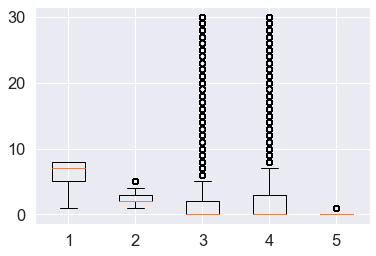

In [13]:

#box plot columns in the data to show large variances in data
plt.boxplot(df[['Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]);

In [14]:
df_subset = df[['Diabetes_binary','Income','GenHlth','MentHlth','PhysHlth','DiffWalk']]

<AxesSubplot:xlabel='Income', ylabel='DiffWalk'>

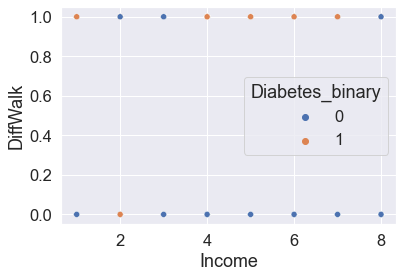

In [18]:
sns.scatterplot(x='Income', y='DiffWalk', data=df, hue='Diabetes_binary')

Graphs shows the data is not linear


Box plot shows large variances and outliers in Mental Health and physicla health data

In [50]:
cdc_features_grp =df_subset.groupby(["Diabetes_binary","Income","PhysHlth","DiffWalk"],as_index=False).agg('count').sort_values(by='Income',ascending=False) 
cdc_features_grp.tail(5)


,Diabetes_binary,Income,PhysHlth,DiffWalk,GenHlth,MentHlth
513,1,1,15,0,23,23
512,1,1,14,1,27,27
511,1,1,14,0,17,17
510,1,1,13,1,3,3
0,0,1,0,0,2804,2804


Chart shows diabets_binary counts against each feature 

In [71]:
cdc_features_grp.describe()

,Diabetes_binary,Income,PhysHlth,DiffWalk,GenHlth,MentHlth
count,911,911,911,911,911,911
mean,0,5,15,1,278,278
std,0,2,9,1,2287,2287
min,0,1,0,0,1,1
25%,0,3,7,0,4,4
50%,0,5,14,1,22,22
75%,1,7,22,1,96,96
max,1,8,30,1,58572,58572


Large variances in the data for GenHlth and MentHlth between mean and max.  This may cause issues in my predictions.  
Will be sure to test with and without these columns and compare accuracy scores 

In [51]:
cdc_features_grp.head(5)

,Diabetes_binary,Income,PhysHlth,DiffWalk,GenHlth,MentHlth
455,0,8,15,1,197,197
469,0,8,22,1,5,5
457,0,8,16,1,4,4
458,0,8,17,0,11,11
459,0,8,17,1,3,3


Graph show diabets count grouped by all features

### Feature: Income

In [66]:
income_features_grp =df.groupby(["Diabetes_binary","Income"],as_index=False).agg(income_count = ('Income','count')).sort_values(by='Income',ascending=False).reset_index() 
income_features_grp.head()

,index,Diabetes_binary,Income,income_count
0,7,0,8,83190
1,15,1,8,7195
2,6,0,7,37954
3,14,1,7,5265
4,5,0,6,31179


<AxesSubplot:xlabel='Income', ylabel='count'>

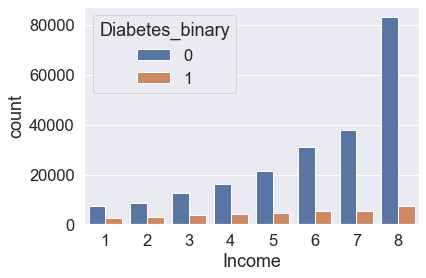

In [20]:
sns.countplot(x='Income', hue='Diabetes_binary', data=df )

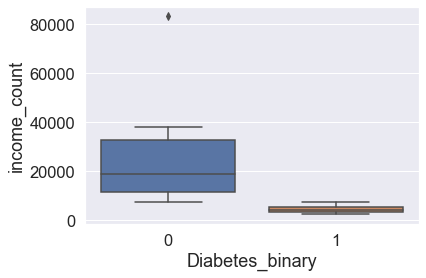

In [78]:
# Box plots for all category features against target
for col in ['Income' ]:
    boxplot = sns.boxplot(x='Diabetes_binary', y='income_count', data=income_features_grp)
    plt.show()

Income does not seem to be a driving factor for diabetes

In [ ]:
my_data = 